In [ ]:
#'##########################################################
#	  	 MODEL SELECTION
# 	a sript for  the project
#	DEMOGRAPHIC BUFFERING CONTINUUM in PLANTS AND ANIMALS
#			 by Gabriel Santos
# 	contact by ssantos.gabriel@gmail.com
#			    05 March 2025
#' ---------------------------------------------------------
# Rationale: We must decide between better model composition
# as Environmental PCA included until 3 axes
# revealing these three potential relevant source of information #
#'##########################################################

set.seed(1)

rm(list=ls())

# Define necessary packages
need_pkgs <- c("tidyverse", "plotMCMC", "mcmcr", "MuMIn", "MCMCglmm","MuMIn")

exist_pckgs<-exist_pckgs <- installed.packages()[, "Package"]

if (any(!need_pkgs %in% exist_pckgs)) {   # Check for inexisting packages and install them
  install.packages(need_pkgs[!need_pkgs %in% exist_pckgs])
}


In [ ]:
# load non-existing packages
lapply(need_pkgs, require, character.only = TRUE)

rm(list=ls())

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: plotMCMC

Loading required package: mcmcr

Registered S3 method overwritten by 'mcmcr':
  method         from 
  as.mcmc.nlists nlist

Loading required package: MuMIn

Loading required package: MCMCglmm

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: coda

Loading required package: ape

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

In [ ]:

#'===========================================================
# ----- LOAD data ready for GLMM analyses ----
# GLMM data contains:
#  - Data model
#  - subtree_Animals - Phylogenetic tree for Animals ready for analysis
#  - subtree_Animals - Phylogenetic tree for Plants ready for analysis
#'===========================================================
# Download data In Google colab
dir.create(file.path("Data"), showWarnings = FALSE) # Will return warning message if folder already exists
GLMMdata_link<-"https://github.com/Ecosantos/Demogbuff-pops/raw/refs/heads/incorporating-MCMCGlmm/Data/GLMMdata.Rdata"
download.file(GLMMdata_link, "Data/GLMMdata.Rdata", mode = "wb")


load("Data/GLMMdata.Rdata")

In [39]:
data_model%>%glimpse()
#'===========================================================
# ---- Define priors ----
#'===========================================================


prior_phylo<-list(G=list(G1=list(V=1,nu=0.02)),
                  R=list(V=1,nu=0.02))

# Prior for simple model will be removed.
# It will run with prior_phylo for standardization!
#prior_simple<-list(G=list(R=list(V=1,nu=0.02)))

nitt=100000; #nitt=1000
burnin=1000; #burnin=100
thin=10

glmmScale<-"FALSE"

#'===========================================================
# ---- Create models manually ----
#'===========================================================
# A function was created to reduce code
fit_mcmcglmm <- function(formula) {
  MCMCglmm(
    formula,
    random = ~phylo,
    family = "gaussian",
    ginverse = list(phylo = inverseA(subtree_Plants, nodes = "TIPS", scale = TRUE)$Ainv),
    prior = prior_phylo,
    data = subset(data_model, Kingdom == "Plantae"),
    nitt = nitt,
    burnin = burnin,
    thin = thin,
    singular.ok = TRUE,
    scale = glmmScale,
    verbose=FALSE
  )
}


# Models with interactions
Clim123 <- fit_mcmcglmm(Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 * ClimPC.2 * ClimPC.3);print("Clim123 - OK")
Clim12 <- fit_mcmcglmm(Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 * ClimPC.2);print("Clim12 - OK")
Clim13 <- fit_mcmcglmm(Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 * ClimPC.3);print("Clim13 - OK")
Clim23 <- fit_mcmcglmm(Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.2 * ClimPC.3);print("Clim23 - OK")

#Aditive models
Clim123_plus<-fit_mcmcglmm(Cumulative_SigElas~LHPC.1 * LHPC.2 + ClimPC.1 + ClimPC.2 + ClimPC.3);print("Clim123_plus - OK")
Clim12_plus<-fit_mcmcglmm(Cumulative_SigElas~LHPC.1 * LHPC.2 + ClimPC.1 + ClimPC.2);print("Clim12_plus - OK")

# Aditive for life history and climatic data
Clim12_plus_only<-fit_mcmcglmm(Cumulative_SigElas~LHPC.1 + LHPC.2 + ClimPC.1 + ClimPC.2);print("Clim12 plusonly - OK")

# Models with single climatic variable
Clim1 <- fit_mcmcglmm(Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1);print("Clim1 - OK")
Clim2 <- fit_mcmcglmm(Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.2);print("Clim2 - OK")
Clim3 <- fit_mcmcglmm(Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.3);print("Clim3 - OK")


Rows: 134
Columns: 25
$ ID                   <chr> "Urs2.183_726", "Flcn.170_257", "Lgps.394_383", "…
$ Reproduction_SigElas <dbl> 1.364528e-04, -1.938652e-03, -2.377753e-02, -1.02…
$ Growth_SigElas       <dbl> 7.525562e-04, 0.000000e+00, 0.000000e+00, 0.00000…
$ Shrinking_SigElas    <dbl> 4.928246e-04, 0.000000e+00, 0.000000e+00, 0.00000…
$ Clonality_SigElas    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Survival_SigElas     <dbl> -1.692481e-02, -7.611464e-03, -8.279373e-02, -9.8…
$ Cumulative_SigElas   <dbl> 0.0155429721, 0.0095501157, 0.1065712526, 0.10840…
$ Buffmx               <dbl> 1.0205700, 1.0084916, 1.1488676, 1.1131551, 1.017…
$ MatRep               <int> 5, 5, 5, 6, 5, 3, 3, 4, 9, 11, 3, 3, 4, 4, 53, 4,…
$ LHPC.1               <dbl> 4.0555225, -2.9624200, -3.5976811, 1.6025393, 1.0…
$ LHPC.2               <dbl> -0.69666310, -0.12995466, 0.73974502, -0.61097725…
$ ClimPC.1             <dbl> 3.3882768, -0.2612499, 0.1603933, 0.1603933, -0.5…
$ ClimPC.2        

,formulas,df,BIC,AIC,DIC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Clim12,Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 * ClimPC.2,9,-377.2362,-402.3983,-410.4593
Clim12_plus_only,Cumulative_SigElas ~ LHPC.1 + LHPC.2 + ClimPC.1 + ClimPC.2,7,-407.6386,-427.2092,-409.1122
Clim3,Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.3,7,-404.5959,-424.1664,-398.5637
Clim2,Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.2,7,-420.4524,-440.0229,-375.9760
Clim23,Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.2 * ClimPC.3,9,-416.2909,-441.4530,-375.9760
Clim12_plus,Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 + ClimPC.2,8,-413.2367,-435.6030,-373.0777
Clim123_plus,Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 + ClimPC.2 + ClimPC.3,9,-409.1863,-434.3484,-372.5104
Clim123,Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 * ClimPC.2 * ClimPC.3,13,-384.7250,-421.0703,-368.7226
Clim13,Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 * ClimPC.3,9,-400.4967,-425.6589,-367.3683



 Iterations = 1001:99991
 Thinning interval  = 10
 Sample size  = 9900 

 DIC: -410.4593 

 G-structure:  ~phylo

      post.mean l-95% CI u-95% CI eff.samp
phylo    0.1939 0.001559    0.272    13.77

 R-structure:  ~units

      post.mean  l-95% CI u-95% CI eff.samp
units  0.003896 0.0007457  0.03004    8.923

 Location effects: Cumulative_SigElas ~ LHPC.1 * LHPC.2 + ClimPC.1 * ClimPC.2 

                  post.mean  l-95% CI  u-95% CI eff.samp  pMCMC  
(Intercept)        0.067037 -0.260717  0.425833  9570.61 0.6570  
LHPC.1            -0.011139 -0.023068  0.001173   185.59 0.0414 *
LHPC.2            -0.006645 -0.026961  0.014902   107.99 0.5236  
ClimPC.1           0.018332 -0.016543  0.054258   402.35 0.3012  
ClimPC.2           0.035210  0.005949  0.061714   496.19 0.0246 *
LHPC.1:LHPC.2      0.007214 -0.005526  0.020019    34.99 0.1651  
ClimPC.1:ClimPC.2  0.014731 -0.007965  0.039423    66.85 0.1715  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

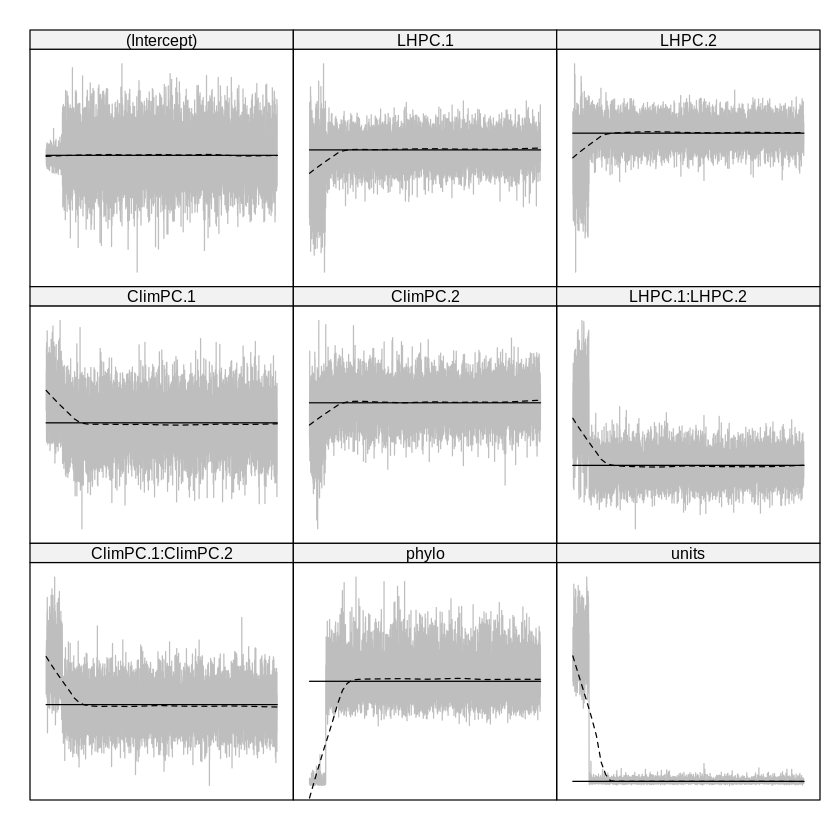

In [40]:
forms<-lapply(
  lapply(
    list(Clim1,Clim2,Clim3,
         Clim123,
         Clim12,Clim13,Clim23,
         Clim123_plus,Clim12_plus,
         Clim12_plus_only),formula),
          function(f) paste(deparse(formula(f)), collapse = ""))%>%do.call(rbind,.)

mod_out<-cbind(formulas=forms,
  BIC(Clim1,Clim2,Clim3,Clim123,Clim12,Clim13,Clim23,Clim123_plus,Clim12_plus,Clim12_plus_only),
  AIC=AIC(Clim1,Clim2,Clim3,Clim123,Clim12,Clim13,Clim23,Clim123_plus,Clim12_plus,Clim12_plus_only)[,2],
  DIC=DIC(Clim1,Clim2,Clim3,Clim123,Clim12,Clim13,Clim2,Clim123_plus,Clim12_plus,Clim12_plus_only)[,2])%>%
  arrange(DIC)

mod_out


Clim12%>%summary()

allChains <- mcmcr::as.mcmc(cbind(Clim12$Sol,Clim12$VCV))
plotMCMC::plotTrace(allChains)


# Compare some models if necessary
#summary(Clim123)
#summary(Clim123_plus)
#summary(Clim12_plus)
#summary(Clim1)
#summary(Clim12)
#summary(Clim13)
